In [1]:
#3.3.2
import numpy as np

def distance(p1,p2):
    
    """Find the distance between point p1 and p2
    """
    return np.sqrt((np.sum(np.power(p2-p1,2))))
p1=np.array([1,1])
p2=np.array([4,4])
    

In [2]:
distance(p1,p2)

4.242640687119285

In [3]:
#3.3.3
import random
def majority_votes(votes):
    """Returns the most common element in votes"""
    vote_count={}
        
    for vote in votes:
        #know word
        if vote in vote_count:
                vote_count[vote]+=1
        #unknown word
        else:
            vote_count[vote]=1
            
    winner=[]
    max_count=max(vote_count.values())
    for vote,count in vote_count.items():
        if count==max_count:
            winner.append(vote)
    return random.choice(winner)
    
    return vote_count



#this funtion does the same thing as the above function
import scipy.stats as ss
def majority_votes_short(votes):
    """Returns the most common element in votes"""
    mode,count=ss.mstats.mode(votes)
    return mode
    
    

In [4]:
votes=[1,2,3,1,1,1,2,2,2,2,2,3,4,5,5,5,5,4,4,4,4,4,4,3,3,3,2,1]
winner=majority_votes(votes)

In [5]:
winner=majority_votes_short(votes)

In [6]:
winner


array([2.])

In [7]:
#3.3.4
#loop over all points 
    #compute the distance between point p and every other point
#sort distances and return those k points that are nearest to point p




points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p=np.array([2.5,2])
import matplotlib.pyplot as plt
# plt.plot(points[:,0],points[:,1],"ro")
# plt.plot(p[0],p[1],"bo")
# plt.axis([0.5, 3.5, 0.5, 3.5])


def find_nearest_neighbors(p, points, k=5):
    """Find the k nearest neighbour of point p and to return their indices."""
    distances=np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i]=distance(p, points[i])
    ind=np.argsort(distances)
    return ind[:k]

ind= find_nearest_neighbors(p, points, 2);print(points[ind])

def knn_predict(p, points,outcomes, k=5):
    ind=find_nearest_neighbors(p, points, k)
    return majority_votes(outcomes[ind])
    #predict the class of p based on majority votes

outcomes=np.array([0,0,0,0,1,1,1,1,1])
a=knn_predict(np.array([2.5,2.7]), points, outcomes, k=2)
b=knn_predict(np.array([1.0,2.7]), points, outcomes, k=2)

[[2 2]
 [3 2]]


In [20]:
#3.3.5
def generate_synth_data(n=50):
    """Creat two setts of points from bivariate normal distributions."""
    points=np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return(points,outcomes)

In [21]:
(points, outcomes)= generate_synth_data(n)

NameError: name 'n' is not defined

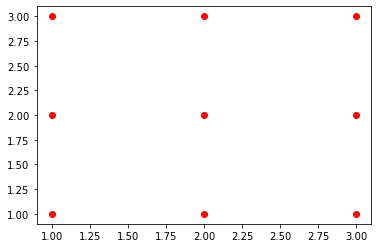

In [22]:
n=20
plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro")
plt.plot(points[n:,0],points[n:,1],"bo")
plt.savefig("bivardata.pdf")

In [53]:
#3.3.6
def make_prediction_grid(predictors,outcomes,limits,h,k):
    """Classify each point on the prediction grid"""
    (x_min, x_max, y_min, y_max)=limits
    xs=np.arange(x_min, x_max, h)
    ys=np.arange(y_min, y_max, h)
    xx, yy =np.meshgrid(xs, ys)
    
    prediction_grid= np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p=np.array([x,y])
            prediction_grid[j,i]=knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

In [54]:
seasons=["spring","summer","fall","winter"]
list(enumerate(seasons))

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]

In [55]:
#3.3.7

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)


(predictors, outcomes)= generate_synth_data()

In [56]:
predictors.shape

(100, 2)

In [57]:
outcomes.shape

(100,)

<ipython-input-55-001174b3fb47>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


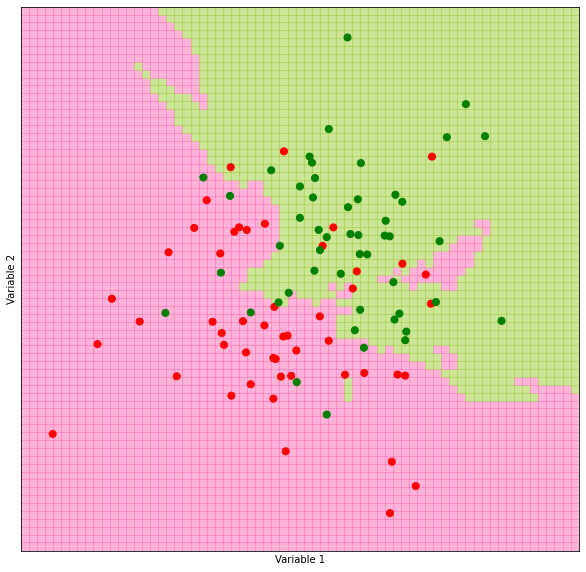

In [58]:
k=5; filename="knn_synth_5.pdf"; limits= (-3,4,-3,4); h=0.1
(xx, yy, prediction_grid)= make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

<ipython-input-55-001174b3fb47>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


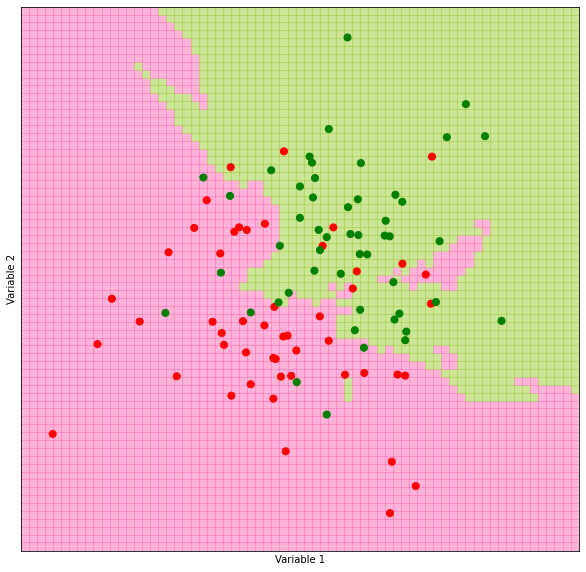

In [59]:
k=5; filename="knn_synth_50.pdf"; limits= (-3,4,-3,4); h=0.1
(xx, yy, prediction_grid)= make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [37]:
#3.3.8

from sklearn import datasets
iris=datasets.load_iris()

In [38]:
predictors = iris.data[:,0:2]
outcomes = iris.target

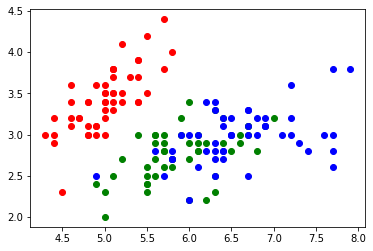

In [39]:
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==2][:,1], "bo")
plt.savefig("iris.pdf")

<ipython-input-32-001174b3fb47>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


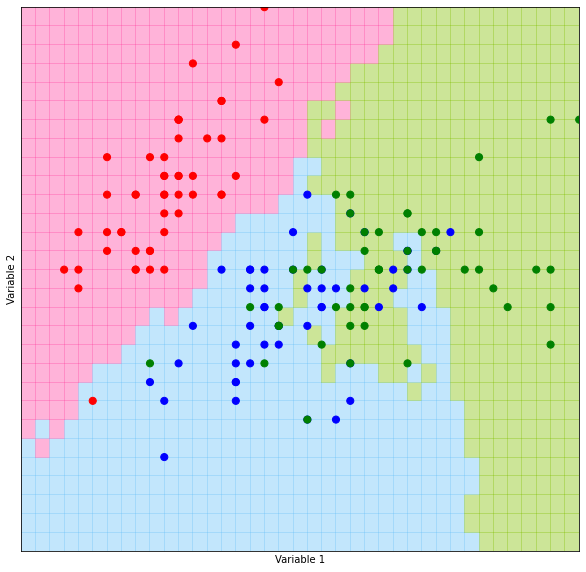

In [40]:
k=5; filename="iris_grid.pdf"; limits= (4,8,1.5,4.5); h=0.1
(xx, yy, prediction_grid)= make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [46]:
sk_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [48]:
my_predictions.shape

(150,)

In [50]:
np.mean(sk_predictions==my_predictions)

0.96

In [51]:
print(100*np.mean(sk_predictions==my_predictions))

96.0


In [52]:
print(100*np.mean(sk_predictions==outcomes))
print(100*np.mean(my_predictions==outcomes))

83.33333333333334
84.66666666666667
